In [1]:
using Pkg
Pkg.activate("../")
Pkg.instantiate()
Pkg.status()

  Activating project at `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_1D_parameter_variation`


Status `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_1D_parameter_variation/Project.toml`
  [8bb1440f] DelimitedFiles v1.9.1
  [0bd82848] FEMTISE v1.0.0-DEV `~/github_repositories/my_repositories/FEMTISE.jl`
  [56d4f2e9] Gridap v0.18.2
  [033835bb] JLD2 v0.4.48
  [f0f68f2c] PlotlyJS v0.18.13
  [91a5bcdd] Plots v1.40.4
  [295af30f] Revise v3.5.14


In [2]:
develop_package = false
computer = "notebook"

if computer == "notebook"
    kernel_dir = "mendez"
elseif computer == "pcfamaf"
    kernel_dir = "martin"
elseif computer == "ccad"
    kernel_dir = "martinmendez"
end

develop_package ? Pkg.develop(path="/home/$(kernel_dir)/github_repositories/my_repositories/FEMTISE.jl") : nothing

In [3]:
install_pkg = false
if install_pkg
    Pkg.add("Revise")
    Pkg.add("Gridap")
    Pkg.add("Plots")
    Pkg.add("JLD2")
    Pkg.add("DelimitedFiles")
    Pkg.add("PlotlyJS")
end
using Revise;
using FEMTISE;
using Gridap;
using Gridap.CellData;
using Plots;
using JLD2;
using DelimitedFiles;

In [8]:
include("./post_proccesing_result_data.jl")
include("./adhoc_potential_function.jl")

coulomb_potential_interaction_1D (generic function with 1 method)

In [5]:
path_repository="/home/$(kernel_dir)/github_repositories/my_repositories/FEMTISE_TUTORIAL/"
path_input_file="$(path_repository)030_experimentation/030_test/coulomb_potential_1D_parameter_variation/020_input/"
input_file_name="$(path_input_file)input"

"/home/mendez/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_1D_parameter_variation/020_input/input"

In [9]:
simulation_info, output_data = collect_result_data(true,input_file_name)

(InputData1D{Tuple{String, String}, Params1D, Bool}("/home/mendez/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_1D_parameter_variation/040_output/", "/home/mendez/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_1D_parameter_variation/050_analysis/adhoc_potential_function", Params1D("1D", 100.0, "ns", 0.1, 10, 0.0, "coulomb_potential_interaction_1D", (-1.0, -1.0, 0.01)), false, ("jld2", "eigen")), DefaultJLD2EigenProblem{Vector{Float64}, Vector{VectorValue{1, Float64}}}(ComplexF64[0.014992212660970772 - 1.1750488406398212e-18im, 0.020338859316770697 + 1.2278433070075545e-18im, 0.02608321294138056 + 2.969192901754202e-18im, 0.032423687717649155 + 6.078150189926627e-18im, 0.0394462883434214 + 2.7943460548513886e-18im, 0.04720380919841334 - 5.5689223583034386e-18im, 0.055734108945548845 - 1.4636721947755e-18im, 0.06506652450155188 - 4.204775118347511e-18im, 0.07522475939991947 + 6.7980

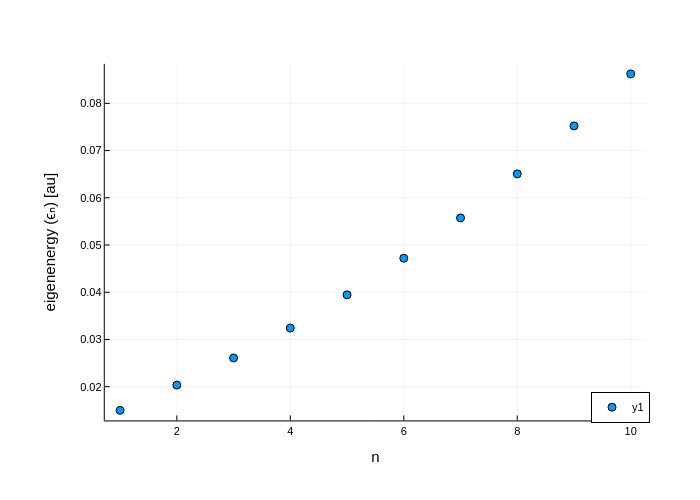

In [10]:
fig1 = plot_eigenvalues(simulation_info, output_data)
display(fig1)

In [19]:
save("eigenenergies.pdf",fig1)